In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import nltk
import seaborn as sns
import matplotlib.pyplot as plt


# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to C:\Users\Rohith gowda
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Rohith gowda
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rohith gowda
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
# Load the dataset
file_path = './cyberbullying_tweets(ML).csv'  # Replace with your file path
data = pd.read_csv(file_path)
data.head()


,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [13]:
# Define a leetspeak dictionary for normalization
leet_dict = {
    '@': 'a', '$': 's', '0': 'o', '1': 'i', '3': 'e', '4': 'a', '5': 's', '7': 't', '!': 'i'
}

# Function to normalize leetspeak
def normalize_leetspeak(text):
    for symbol, replacement in leet_dict.items():
        text = text.replace(symbol, replacement)
    return text


In [14]:
# Enhanced preprocessing function
def preprocess_text_advanced(text):
    # Initialize Lemmatizer and define stop words
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    # Normalize leetspeak
    text = normalize_leetspeak(text)
    
    # Remove URLs and mentions
    text = re.sub(r'http\\S+|@\\w+', '', text)
    
    # Tokenize and lowercase
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation and stop words
    tokens = [re.sub(r'[^a-zA-Z]', '', word) for word in tokens if word not in stop_words]
    
    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word]
    
    return " ".join(lemmatized_tokens)

# Apply the enhanced preprocessing function
data['processed_tweet'] = data['tweet_text'].apply(preprocess_text_advanced)
data.head()


,tweet_text,cyberbullying_type,processed_tweet
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandre food crapiliciousi mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,axochitlsuckkks classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,ajasongio meh p thanks head concerned another ...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,arudhoeenglish isi account pretending kurdish ...


In [15]:
# Transform tweets into TF-IDF vectors
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['processed_tweet']).toarray()
y = data['cyberbullying_type']


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Function to plot heatmap for confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [18]:
# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict with Naive Bayes
y_pred_nb = nb_model.predict(X_test)

# Evaluate Naive Bayes
print("Naive Bayes - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

print("\nNaive Bayes - Classification Report:")
print(classification_report(y_test, y_pred_nb))

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes - Accuracy: {accuracy_nb:.2f}")


Naive Bayes - Confusion Matrix:
[[1536    6    6   28   19    8]
 [  40 1455   19    9   34   46]
 [  19   33 1260  104   89   26]
 [ 171   72  124  701  410  146]
 [ 157   87  151  198  955   64]
 [  13    7   15   20    6 1505]]

Naive Bayes - Classification Report:
                     precision    recall  f1-score   support

                age       0.79      0.96      0.87      1603
          ethnicity       0.88      0.91      0.89      1603
             gender       0.80      0.82      0.81      1531
  not_cyberbullying       0.66      0.43      0.52      1624
other_cyberbullying       0.63      0.59      0.61      1612
           religion       0.84      0.96      0.90      1566

           accuracy                           0.78      9539
          macro avg       0.77      0.78      0.77      9539
       weighted avg       0.77      0.78      0.77      9539

Naive Bayes - Accuracy: 0.78


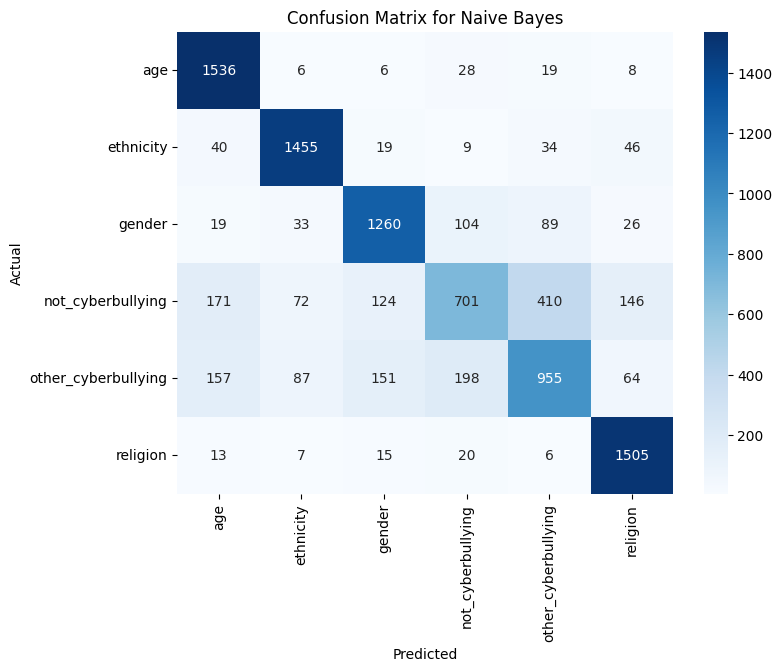

In [19]:
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")

In [20]:
# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict with Logistic Regression
y_pred_lr = lr_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nLogistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_lr))

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression - Accuracy: {accuracy_lr:.2f}")


Logistic Regression - Confusion Matrix:
[[1546    0    5   27   24    1]
 [   3 1556    2   10   27    5]
 [   3    4 1267  140  111    6]
 [  55   12   58  937  508   54]
 [  13    9   66  376 1139    9]
 [   4    4    4   63   19 1472]]

Logistic Regression - Classification Report:
                     precision    recall  f1-score   support

                age       0.95      0.96      0.96      1603
          ethnicity       0.98      0.97      0.98      1603
             gender       0.90      0.83      0.86      1531
  not_cyberbullying       0.60      0.58      0.59      1624
other_cyberbullying       0.62      0.71      0.66      1612
           religion       0.95      0.94      0.95      1566

           accuracy                           0.83      9539
          macro avg       0.84      0.83      0.83      9539
       weighted avg       0.83      0.83      0.83      9539

Logistic Regression - Accuracy: 0.83


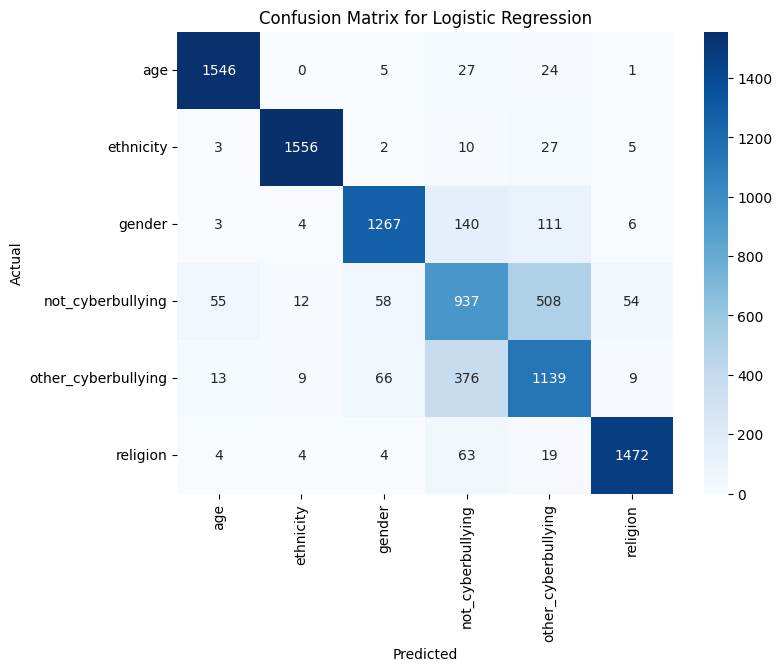

In [21]:
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

In [22]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict with Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nDecision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dt))

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree - Accuracy: {accuracy_dt:.2f}")


Decision Tree - Confusion Matrix:
[[1544    4    5   25   24    1]
 [   6 1544   14   17   18    4]
 [   1    4 1277  123  118    8]
 [  24    7   94  806  638   55]
 [  12    4  114  568  906    8]
 [   1   11   11   61   32 1450]]

Decision Tree - Classification Report:
                     precision    recall  f1-score   support

                age       0.97      0.96      0.97      1603
          ethnicity       0.98      0.96      0.97      1603
             gender       0.84      0.83      0.84      1531
  not_cyberbullying       0.50      0.50      0.50      1624
other_cyberbullying       0.52      0.56      0.54      1612
           religion       0.95      0.93      0.94      1566

           accuracy                           0.79      9539
          macro avg       0.80      0.79      0.79      9539
       weighted avg       0.79      0.79      0.79      9539

Decision Tree - Accuracy: 0.79


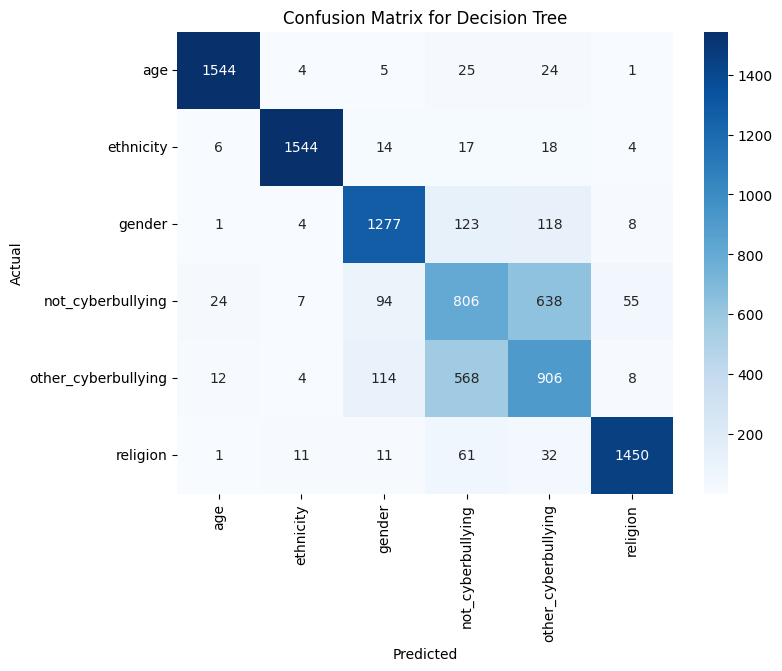

In [23]:
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest - Accuracy: {accuracy_rf:.2f}")


In [ ]:
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

In [ ]:
# Compare accuracies
accuracies = {
    "Naive Bayes": accuracy_nb,
    "Logistic Regression": accuracy_lr,
    "Decision Tree": accuracy_dt,
    "Random Forest": accuracy_rf
}

best_model = max(accuracies, key=accuracies.get)
print(f"The best model is {best_model} with an accuracy of {accuracies[best_model]:.2f}.")
